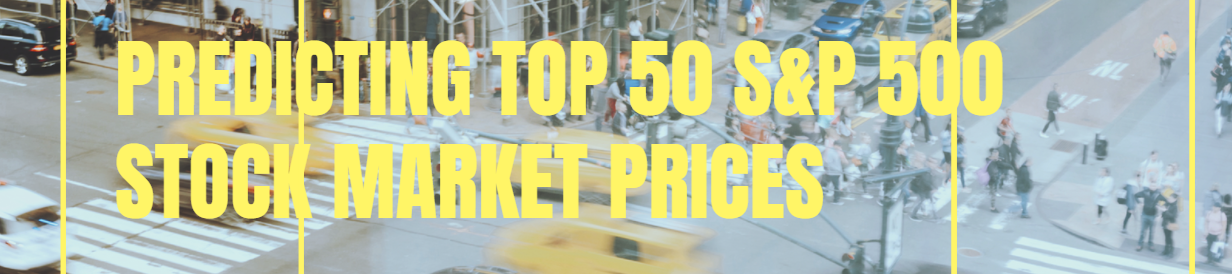

## About the Project

Forecasting can be defined as the prediction of some future event by analyzing historical data. This notebook contains the data collection, cleaning and exploratory data analysis for our capstone project: Predicting Top 50 S&P 500 Stock Market Prices wherein our dataset was collected from YahooFinance API ranging from 2015-2020.

Proponents of the project are Janine Cheong, Faye Gabasa, and Martin Sison. This capstone project was created as a completion requirement for Analytiks Inc. bootcamp.

## Data Science question: HOW DO WE MAKE TRADING ACCESSIBLE TO BEGINNERS?
 
 -	This would support beginners in the stock market by providing a general guide on the price predictions – easing their entry to learning the field.
 -	As beginners ourselves, this project was helpful to identify application opportunities of machine learning in the stock market. It is helpful to bridge whether the technical analysis of stock market coincides or follows the machine learning application.

### Import necessary libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For calculation and web scrape
import math
import pandas_datareader as web
import yfinance as yf

#date formatting
from datetime import datetime

# Style settings
sns.set_style('whitegrid')
%matplotlib inline

# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

### Project Roadmap

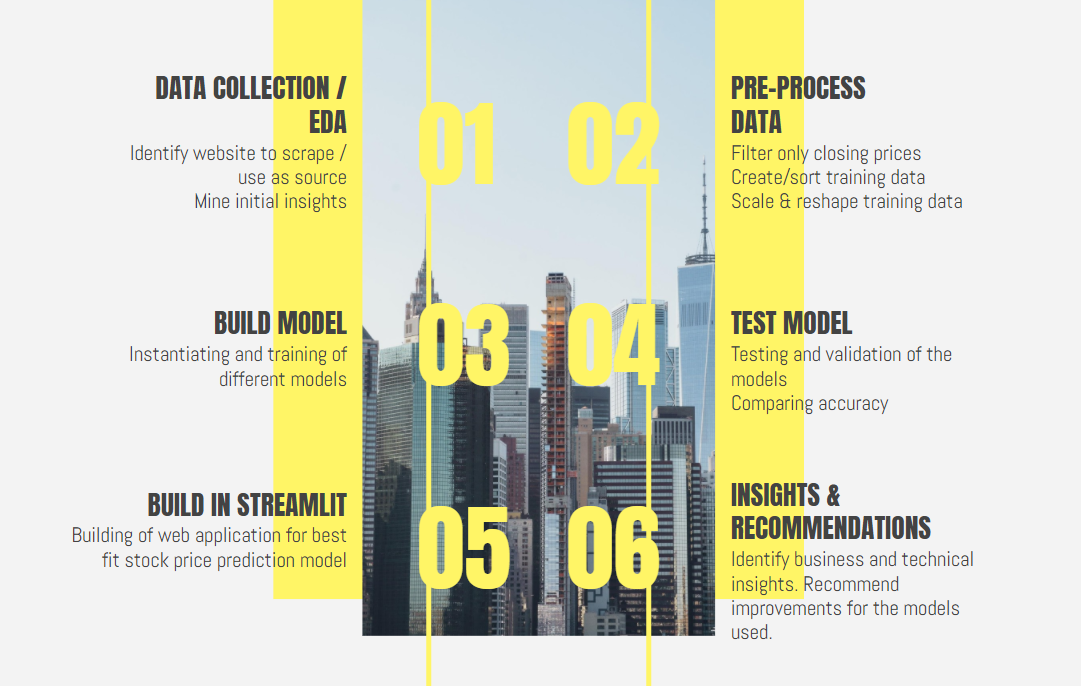

### Data Preparation

In [2]:
# Webscrape the data from Wikipedia
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0) #pd.read_html is used since the data we want to scrape is already a table
    df = html[0] #specify that we only want the first table
    return df

In [3]:
# Getting summary of all S&P 500 companies
df = load_data()
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
df.shape

(505, 9)

In [5]:
# Webscrape the data to get Top 50 Companies in the S&P 500 By Weight as of December 2020
def load_data():
    url = 'https://dailypik.com/top-50-companies-sp-500/'
    html = pd.read_html(url, header = 0) #pd.read_html is used since the data we want to scrape is already a table
    df2 = html[0] #specify that we only want the first table
    return df2

In [6]:
# Get Top 50 Companies in the S&P 500
df2 = load_data()
df2.head()

,Company,Symbol
0,Apple Inc.,AAPL
1,Microsoft Corp.,MSFT
2,Amazon.com Inc.,AMZN
3,Facebook Inc. Class A,FB
4,Tesla,TSLA


In [7]:
# Temporarily add 'index' as column
df2.reset_index(level=0, inplace=True)

# Adding ranks for the top 50 S&P 500 companies
df2["Rank"] = df2['index'].rank(ascending = True)
df2.head()

,index,Company,Symbol,Rank
0,0,Apple Inc.,AAPL,1.0
1,1,Microsoft Corp.,MSFT,2.0
2,2,Amazon.com Inc.,AMZN,3.0
3,3,Facebook Inc. Class A,FB,4.0
4,4,Tesla,TSLA,5.0


In [8]:
# Join the two tables: df and df2
top_50 = pd.merge(df, df2, on = 'Symbol', how = 'inner')
top_50.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,index,Company,Rank
0,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888,31,Abbott Laboratories,32.0
1,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),32,AbbVie Inc.,33.0
2,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,40,Accenture Plc Class A,41.0
3,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982,19,Adobe Inc.,20.0
4,GOOGL,Alphabet Inc. (Class A),reports,Communication Services,Interactive Media & Services,"Mountain View, California",2014-04-03,1652044,1998,5,Alphabet Inc. Class A,6.0


In [9]:
top_50.shape

(50, 12)

In [10]:
# Take note: LONG RUNTIME ~3 mins
# Retrieving columns for Beta, Dividend Rate, and Dividend Yield
dict_stock_beta = {}
dict_stock_div = {}
dict_stock_divi_yield = {}
no_data = []
for stock in list(top_50.Symbol):
    try:
        placeholder = yf.Ticker(stock)
        placeholder_dict = placeholder.info
        dict_stock_beta[stock] = placeholder_dict['beta']
        dict_stock_div[stock] = placeholder_dict['dividendRate']
        dict_stock_divi_yield[stock] = placeholder_dict['dividendYield']
    except ValueError: #expected reason: BRK.B stock has no data
        no_data.append(stock)

In [11]:
# Convert dictionary values to dataframe
dict_to_df = {'Symbol': list(dict_stock_beta.keys()), 'Beta': list(dict_stock_beta.values()), 'Dividend Rate': list(dict_stock_div.values()), 'Dividend Yield': list(dict_stock_divi_yield.values())}
df3 = pd.DataFrame(dict_to_df)
df3.head()

,Symbol,Beta,Dividend Rate,Dividend Yield
0,ABT,0.825105,1.80,0.0160
1,ABBV,0.819327,5.20,0.0469
2,ACN,1.081407,3.52,0.0138
3,ADBE,0.971638,NaN,NaN
4,GOOGL,0.994747,NaN,NaN


In [12]:
# Join the two tables: top_50 and df3 and drop the unnecessary columns 
top_50 = pd.merge(top_50, df3, on = 'Symbol', how = 'inner')
top_50.drop(['Security', 'SEC filings', 'GICS Sub-Industry', 'Headquarters Location', 'Date first added', 'CIK', 'Founded', 'index'], axis = 1, inplace = True)
top_50.head()

,Symbol,GICS Sector,Company,Rank,Beta,Dividend Rate,Dividend Yield
0,ABT,Health Care,Abbott Laboratories,32.0,0.825105,1.80,0.0160
1,ABBV,Health Care,AbbVie Inc.,33.0,0.819327,5.20,0.0469
2,ACN,Information Technology,Accenture Plc Class A,41.0,1.081407,3.52,0.0138
3,ADBE,Information Technology,Adobe Inc.,20.0,0.971638,NaN,NaN
4,GOOGL,Communication Services,Alphabet Inc. Class A,6.0,0.994747,NaN,NaN


#### Webscrape Market Cap in Billions data

In [13]:
# Webscrape the data to get Market Cap in Billions for Top 50 Companies in the S&P 500 as of December 2020
def load_data():
    url = 'https://fknol.com/list/market-cap-sp-500-index-companies.php'
    html = pd.read_html(url, header = 0) #pd.read_html is used since the data we want to scrape is already a table
    df4 = html[0] #specify that we only want the first table
    return df4

In [14]:
# Get the Market Cap in Billions for Top 50 Companies in the S&P 500
df4 = load_data()
df4.head()

,Company (Ticker),Company Description,Market Cap,Stock Price ↑↓,PE Ratio ↑↓,EPS ↑↓,Unnamed: 6,Unnamed: 7
0,Sorted by Market Cap. Click on the arrow butto...,Sorted by Market Cap. Click on the arrow butto...,Sorted by Market Cap. Click on the arrow butto...,Sorted by Market Cap. Click on the arrow butto...,Sorted by Market Cap. Click on the arrow butto...,Sorted by Market Cap. Click on the arrow butto...,Sorted by Market Cap. Click on the arrow butto...,Sorted by Market Cap. Click on the arrow butto...
1,1) Apple (AAPL),"Apple Inc., incorporated on January 3, 1977, d...",$2256 billion,$132.69,30.5,3.28,NaN,NaN
2,2) Microsoft (MSFT),"Microsoft Corporation, incorporated on Septemb...",$1682 billion,$222.42,29.78,6.2,NaN,NaN
3,3) Amazon (AMZN),"Amazon.com, Inc., incorporated on May 28, 1996...",$1634 billion,$3256.93,71.72,34.2,NaN,NaN
4,4) Alphabet (GOOGL),Alphabet Inc. provides online advertising serv...,$1187 billion,$1752.64,28.6,51.75,NaN,NaN


In [15]:
# Drop first row
df4.drop(df4.index[0], inplace=True)
df4.head()

,Company (Ticker),Company Description,Market Cap,Stock Price ↑↓,PE Ratio ↑↓,EPS ↑↓,Unnamed: 6,Unnamed: 7
1,1) Apple (AAPL),"Apple Inc., incorporated on January 3, 1977, d...",$2256 billion,$132.69,30.5,3.28,NaN,NaN
2,2) Microsoft (MSFT),"Microsoft Corporation, incorporated on Septemb...",$1682 billion,$222.42,29.78,6.2,NaN,NaN
3,3) Amazon (AMZN),"Amazon.com, Inc., incorporated on May 28, 1996...",$1634 billion,$3256.93,71.72,34.2,NaN,NaN
4,4) Alphabet (GOOGL),Alphabet Inc. provides online advertising serv...,$1187 billion,$1752.64,28.6,51.75,NaN,NaN
5,5) Alphabet (GOOG),Alphabet Inc. provides online advertising serv...,$1184 billion,$1751.88,28.58,51.75,NaN,NaN


In [16]:
# Remove '$' and 'billions' from Market Cap column then convert to float
df4["Market Cap"] = df4["Market Cap"].apply(lambda x: x.replace("$", ""))
df4["Market Cap"] = df4["Market Cap"].apply(lambda x: x.replace("billion", "")).astype(float)
df4.head()

,Company (Ticker),Company Description,Market Cap,Stock Price ↑↓,PE Ratio ↑↓,EPS ↑↓,Unnamed: 6,Unnamed: 7
1,1) Apple (AAPL),"Apple Inc., incorporated on January 3, 1977, d...",2256.0,$132.69,30.5,3.28,NaN,NaN
2,2) Microsoft (MSFT),"Microsoft Corporation, incorporated on Septemb...",1682.0,$222.42,29.78,6.2,NaN,NaN
3,3) Amazon (AMZN),"Amazon.com, Inc., incorporated on May 28, 1996...",1634.0,$3256.93,71.72,34.2,NaN,NaN
4,4) Alphabet (GOOGL),Alphabet Inc. provides online advertising serv...,1187.0,$1752.64,28.6,51.75,NaN,NaN
5,5) Alphabet (GOOG),Alphabet Inc. provides online advertising serv...,1184.0,$1751.88,28.58,51.75,NaN,NaN


In [17]:
# Create new column 'Symbol'
df4[["Company (Ticker)", "Symbol"]] = df4["Company (Ticker)"].str.split('(', expand=True)
df4['Symbol'] = df4['Symbol'].str[:-1]
df4.head()                                          

,Company (Ticker),Company Description,Market Cap,Stock Price ↑↓,PE Ratio ↑↓,EPS ↑↓,Unnamed: 6,Unnamed: 7,Symbol
1,1) Apple,"Apple Inc., incorporated on January 3, 1977, d...",2256.0,$132.69,30.5,3.28,NaN,NaN,AAPL
2,2) Microsoft,"Microsoft Corporation, incorporated on Septemb...",1682.0,$222.42,29.78,6.2,NaN,NaN,MSFT
3,3) Amazon,"Amazon.com, Inc., incorporated on May 28, 1996...",1634.0,$3256.93,71.72,34.2,NaN,NaN,AMZN
4,4) Alphabet,Alphabet Inc. provides online advertising serv...,1187.0,$1752.64,28.6,51.75,NaN,NaN,GOOGL
5,5) Alphabet,Alphabet Inc. provides online advertising serv...,1184.0,$1751.88,28.58,51.75,NaN,NaN,GOOG


In [18]:
# Drop the unnecessary columns 
df4.drop(['Company (Ticker)', 'Company Description', 'Stock Price ↑↓', 'PE Ratio ↑↓', 'EPS ↑↓', 'Unnamed: 6', 'Unnamed: 7'], axis = 1, inplace = True)
df4.head()

,Market Cap,Symbol
1,2256.0,AAPL
2,1682.0,MSFT
3,1634.0,AMZN
4,1187.0,GOOGL
5,1184.0,GOOG


In [19]:
# Join the two tables: top_50 and df4
top_50 = pd.merge(top_50, df4, on = 'Symbol', how = 'inner')
top_50.head()

,Symbol,GICS Sector,Company,Rank,Beta,Dividend Rate,Dividend Yield,Market Cap
0,ABT,Health Care,Abbott Laboratories,32.0,0.825105,1.80,0.0160,194.06
1,ABBV,Health Care,AbbVie Inc.,33.0,0.819327,5.20,0.0469,189.17
2,ACN,Information Technology,Accenture Plc Class A,41.0,1.081407,3.52,0.0138,173.07
3,ADBE,Information Technology,Adobe Inc.,20.0,0.971638,NaN,NaN,239.92
4,GOOGL,Communication Services,Alphabet Inc. Class A,6.0,0.994747,NaN,NaN,1187.00


In [20]:
top_50.shape

(49, 8)

In [21]:
# Sort Top 50 stocks by rank
top_50_final = top_50.sort_values('Rank', ascending = True).reset_index(drop=True)
top_50_final.head()

,Symbol,GICS Sector,Company,Rank,Beta,Dividend Rate,Dividend Yield,Market Cap
0,AAPL,Information Technology,Apple Inc.,1.0,1.283613,0.82,0.0059,2256.00
1,MSFT,Information Technology,Microsoft Corp.,2.0,0.826155,2.24,0.0099,1682.00
2,AMZN,Consumer Discretionary,Amazon.com Inc.,3.0,1.198004,NaN,NaN,1634.00
3,FB,Communication Services,Facebook Inc. Class A,4.0,1.182773,NaN,NaN,778.04
4,TSLA,Consumer Discretionary,Tesla,5.0,2.190651,NaN,NaN,668.91


In [22]:
# Save as CSV file
top_50_final.to_csv("../Stock_Price_Project/Datasets/top_50_final_eda.csv", index=False)

### List of Top 50 in S&P 500 companies

In [23]:
# Load the data
df = pd.read_csv('../Stock_Price_Project/Datasets/top_50_final_eda.csv')
df.head()

,Symbol,GICS Sector,Company,Rank,Beta,Dividend Rate,Dividend Yield,Market Cap
0,AAPL,Information Technology,Apple Inc.,1.0,1.283613,0.82,0.0059,2256.00
1,MSFT,Information Technology,Microsoft Corp.,2.0,0.826155,2.24,0.0099,1682.00
2,AMZN,Consumer Discretionary,Amazon.com Inc.,3.0,1.198004,NaN,NaN,1634.00
3,FB,Communication Services,Facebook Inc. Class A,4.0,1.182773,NaN,NaN,778.04
4,TSLA,Consumer Discretionary,Tesla,5.0,2.190651,NaN,NaN,668.91


In [24]:
# As of December 3, 2020, the following are the fifty largest S&P 500 index constituents by weight:
stock_list = list(df['Symbol'])
stock_list

['AAPL',
 'MSFT',
 'AMZN',
 'FB',
 'TSLA',
 'GOOGL',
 'GOOG',
 'JNJ',
 'JPM',
 'V',
 'PG',
 'UNH',
 'DIS',
 'NVDA',
 'MA',
 'HD',
 'PYPL',
 'VZ',
 'ADBE',
 'CMCSA',
 'NFLX',
 'BAC',
 'KO',
 'MRK',
 'PEP',
 'T',
 'PFE',
 'INTC',
 'CRM',
 'WMT',
 'ABT',
 'ABBV',
 'CSCO',
 'TMO',
 'NKE',
 'AVGO',
 'XOM',
 'QCOM',
 'COST',
 'ACN',
 'CVX',
 'MCD',
 'MDT',
 'NEE',
 'TXN',
 'HON',
 'DHR',
 'UNP',
 'BMY']

In [25]:
# https://pypi.org/project/yfinance/

#date today
date_today = datetime.today().strftime('%Y-%m-%d')

sp500 = yf.download(  
        tickers = stock_list,
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None,
        start = '2015-01-01', 
        end = '2020-12-31'
    )

[*********************100%***********************]  49 of 49 completed


In [26]:
sp500

GOOGL                                                  \
                   Open         High          Low        Close   Volume   
Date                                                                      
2014-12-31   537.739990   538.400024   530.200012   530.659973  1232400   
2015-01-02   532.599976   535.799988   527.880005   529.549988  1324000   
2015-01-05   527.150024   527.989990   517.750000   519.460022  2059100   
2015-01-06   520.500000   521.210022   505.549988   506.640015  2722800   
2015-01-07   510.950012   511.489990   503.649994   505.149994  2345900   
...                 ...          ...          ...          ...      ...   
2020-12-23  1723.930054  1744.109985  1721.199951  1728.229980  1148700   
2020-12-24  1729.000000  1742.410034  1724.349976  1734.160034   465600   
2020-12-28  1744.910034  1787.000000  1741.819946  1773.959961  1382500   
2020-12-29  1787.229980  1788.469971  1755.109985  1757.760010   986300   
2020-12-30  1765.000000  1767.760010  1728.000000  1736.250000  1051300   

                 CSCO                                             ...  \
                 Open       High        Low      Close    Volume  ...   
Date                                                              ...   
2014-12-31  23.173497  23.280023  22.788364  22.796558  21478700  ...   
2015-01-02  22.986330  23.200847  22.590297  22.780064  22926500  ...   
2015-01-05  22.540794  22.648053  22.276773  22.326277  29460600  ...   
2015-01-06  22.392278  22.837814  22.309773  22.318022  47297600  ...   
2015-01-07  22.392280  22.606797  22.260269  22.524290  27570800  ...   
...               ...        ...        ...        ...       ...  ...   
2020-12-23  44.290804  44.439595  43.993215  44.022976  12032600  ...   
2020-12-24  44.092414  44.231287  43.874183  44.181690   5720500  ...   
2020-12-28  44.568550  44.975251  44.360240  44.558628  13458400  ...   
2020-12-29  44.608231  44.885977  44.171768  44.280884  11829000  ...   
2020-12-30  44.380080  44.697505  44.082490  44.122169  11043100  ...   

                     V                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2014-12-31   63.585968   64.009904   62.795571   62.800365   5904800   
2015-01-02   63.082998   63.890156   62.869828   63.475796   8389600   
2015-01-05   63.109341   63.111739   62.002791   62.074650  12751200   
2015-01-06   62.223143   62.460259   61.042341   61.674656  11070000   
2015-01-07   61.899804   62.546492   61.662688   62.500984   9346800   
...                ...         ...         ...         ...       ...   
2020-12-23  207.330002  207.330002  205.110001  205.300003   6523100   
2020-12-24  206.639999  208.820007  206.600006  208.699997   3367900   
2020-12-28  209.850006  213.460007  208.949997  212.630005   5816200   
2020-12-29  214.610001  215.240005  213.539993  214.369995   6093400   
2020-12-30  216.000000  220.389999  215.649994  218.360001   8875100   

                   KO                                             
                 Open       High        Low      Close    Volume  
Date                                                              
2014-12-31  35.258635  35.275065  34.683590  34.683590   9369500  
2015-01-02  34.716445  34.831457  34.338558  34.617867   9921100  
2015-01-05  35.069689  35.299710  34.568579  34.617867  26292600  
2015-01-06  34.839667  35.275059  34.700014  34.880741  16897500  
2015-01-07  35.160049  35.414714  34.979322  35.316135  13412300  
...               ...        ...        ...        ...       ...  
2020-12-23  52.950001  53.389999  52.939999  53.080002   7040300  
2020-12-24  53.020000  53.549999  53.020000  53.439999   3265500  
2020-12-28  53.849998  54.439999  53.730000  54.160000   9020500  
2020-12-29  54.450001  54.490002  54.020000  54.130001   8320600  
2020-12-30  54.049999  54.630001  54.029999  54.439999   8142700

### EDA: Top 50 S&P 500 companies

#### Percentage of Companies per Sector

The Information Technology sector covers the highest percentage of companies in the Top 50 S&P 500 companies, followed by Health Care and Communication Services.

In [27]:
# Get the percentage of each sector
sectors = pd.DataFrame((df['GICS Sector'].value_counts() / df['GICS Sector'].count()) * 100)
sectors.astype('object')
sectors.style.background_gradient(cmap='Blues')

,GICS Sector
Information Technology,28.571429
Health Care,20.408163
Communication Services,16.326531
Consumer Staples,10.204082
Consumer Discretionary,10.204082
Financials,4.081633
Energy,4.081633
Industrials,4.081633
Utilities,2.040816


In [28]:
# Plot the number of companies per sector
fig = px.sunburst(df, path=['GICS Sector','Symbol'], height=700)
fig.update_layout(title={
    'text': "Number of Companies per Sector",
    'y':0.97,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    showlegend=False)
fig.show()

#### Stock Volatility per Sector using Beta values

 - Beta value is a measure of a stock’s volatility in relation to the overall market.
 - Beta value > 1.0: stock is more volatile than the S&P 500 market & vice versa.
 - Among the sectors, Information Technology has the most number of companies with Beta > 1.

In [29]:
# Show sectors and beta
beta_sector = df[['GICS Sector', 'Beta']]
beta_sector.head()

,GICS Sector,Beta
0,Information Technology,1.283613
1,Information Technology,0.826155
2,Consumer Discretionary,1.198004
3,Communication Services,1.182773
4,Consumer Discretionary,2.190651


In [30]:
# Setting up true and false values depending on comparison to 1.0
beta_sector.loc[df['Beta'] > 1, 'higher'] = True
beta_sector.loc[df['Beta'] < 1, 'higher'] = False
beta_sector.head()

,GICS Sector,Beta,higher
0,Information Technology,1.283613,True
1,Information Technology,0.826155,False
2,Consumer Discretionary,1.198004,True
3,Communication Services,1.182773,True
4,Consumer Discretionary,2.190651,True


In [31]:
# Getting the number of companies per sector that have Beta > 1
beta_sector_plot = pd.DataFrame(beta_sector.groupby(['GICS Sector'])['higher'].value_counts())
beta_sector_plot = pd.DataFrame(beta_sector.groupby(['GICS Sector'])['higher'].sum())
beta_sector_plot

,higher
GICS Sector,
Communication Services,3
Consumer Discretionary,3
Consumer Staples,0
Energy,2
Financials,2
Health Care,0
Industrials,2
Information Technology,9
Utilities,False


In [32]:
# Replace False value with 0
beta_sector_plot = beta_sector_plot.replace(to_replace =False, value =0) 

# Rename 'higher' column and sort in descending order
beta_sector_plot = beta_sector_plot.rename(columns = {'higher': 'No. of Companies w/ Beta > 1.0'})
beta_sector_plot.sort_values(['No. of Companies w/ Beta > 1.0'], ascending=False, inplace=True)
beta_sector_plot.astype('object')
beta_sector_plot.style.background_gradient(cmap='Blues')

,No. of Companies w/ Beta > 1.0
GICS Sector,
Information Technology,9
Communication Services,3
Consumer Discretionary,3
Energy,2
Financials,2
Industrials,2
Consumer Staples,0
Health Care,0
Utilities,0


#### Dividend per Sector

 - Dividend is the total income an investor receives from a stock or another dividend-yielding asset during a fiscal year.
 - A dividend yield is the ratio of a company’s annual dividend compared to the share price.
 - Among the sectors, the Energy sector has the highest average dividend yield. A higher dividend yield suggests better returns if you’re an investor solely earning from dividends.

In [33]:
# Dividend Rate
div_rate = df[['Symbol', 'Company', 'GICS Sector', 'Dividend Rate', 'Dividend Yield']]
div_rate.head()

,Symbol,Company,GICS Sector,Dividend Rate,Dividend Yield
0,AAPL,Apple Inc.,Information Technology,0.82,0.0059
1,MSFT,Microsoft Corp.,Information Technology,2.24,0.0099
2,AMZN,Amazon.com Inc.,Consumer Discretionary,NaN,NaN
3,FB,Facebook Inc. Class A,Communication Services,NaN,NaN
4,TSLA,Tesla,Consumer Discretionary,NaN,NaN


In [34]:
# Getting average Dividend Yield per sector and sort from highest to lowest
avg_div_rate = pd.DataFrame(div_rate.groupby(['GICS Sector'])['Dividend Yield'].mean())
avg_div_rate = avg_div_rate.rename(columns = {'Dividend Yield': 'Average Dividend Yield'})
avg_div_rate.sort_values(['Average Dividend Yield'], ascending=False, inplace=True)
avg_div_rate.apply(pd.to_numeric).style.background_gradient(cmap='Blues')
avg_div_rate                   

,Average Dividend Yield
GICS Sector,
Energy,0.064750
Communication Services,0.044833
Financials,0.024850
Health Care,0.023220
Consumer Staples,0.022020
Industrials,0.018550
Consumer Discretionary,0.017867
Utilities,0.016600
Information Technology,0.015318


### Inspecting top sector: Information Technology

In [35]:
# Taking only the Top sector: Information Technology
IT_sector = df[df['GICS Sector'].isin(['Information Technology'])]
IT_sector.head()

,Symbol,GICS Sector,Company,Rank,Beta,Dividend Rate,Dividend Yield,Market Cap
0,AAPL,Information Technology,Apple Inc.,1.0,1.283613,0.82,0.0059,2256.00
1,MSFT,Information Technology,Microsoft Corp.,2.0,0.826155,2.24,0.0099,1682.00
9,V,Information Technology,Visa Inc. Class A,11.0,0.956407,1.28,0.0063,482.17
13,NVDA,Information Technology,NVIDIA Corp.,15.0,1.446428,0.64,0.0012,323.24
14,MA,Information Technology,MasterCard Inc. Class A,16.0,1.185924,1.76,0.0053,355.84


In [36]:
IT_sector_list = list(IT_sector['Symbol'])
IT_sector_list

['AAPL',
 'MSFT',
 'V',
 'NVDA',
 'MA',
 'PYPL',
 'ADBE',
 'INTC',
 'CRM',
 'CSCO',
 'AVGO',
 'QCOM',
 'ACN',
 'TXN']

In [37]:
# Set the column name levels
tech_stocks = sp500[IT_sector_list]
tech_stocks.columns.names = ['Stock Ticker','Stock Info']
tech_stocks

Stock Ticker        AAPL                                                 \
Stock Info          Open        High         Low       Close     Volume   
Date                                                                      
2014-12-31     25.693357   25.763955   25.098961   25.137676  165613600   
2015-01-02     25.367691   25.379078   24.447631   24.898552  212818400   
2015-01-05     24.661702   24.743687   24.005818   24.197117  257142000   
2015-01-06     24.263166   24.465853   23.828187   24.199400  263188400   
2015-01-07     24.413472   24.641210   24.299604   24.538729  160423600   
...                  ...         ...         ...         ...        ...   
2020-12-23    132.160004  132.429993  130.779999  130.960007   88223700   
2020-12-24    131.320007  133.460007  131.100006  131.970001   54930100   
2020-12-28    133.990005  137.339996  133.509995  136.690002  124486200   
2020-12-29    138.050003  138.789993  134.339996  134.869995  121047300   
2020-12-30    135.580002  135.990005  133.399994  133.720001   96452100   

Stock Ticker        MSFT                                                ...  \
Stock Info          Open        High         Low       Close    Volume  ...   
Date                                                                    ...   
2014-12-31     41.512481   42.143207   41.263744   41.263744  21552500  ...   
2015-01-02     41.450302   42.125444   41.343701   41.539135  27913900  ...   
2015-01-05     41.192689   41.512495   41.086088   41.157158  39673900  ...   
2015-01-06     41.201567   41.530255   40.455355   40.553074  36447900  ...   
2015-01-07     40.846223   41.272629   40.410934   41.068310  29114100  ...   
...                  ...         ...         ...         ...       ...  ...   
2020-12-23    223.110001  223.559998  220.800003  221.020004  18699600  ...   
2020-12-24    221.419998  223.610001  221.199997  222.750000  10550600  ...   
2020-12-28    224.449997  226.029999  223.020004  224.960007  17933500  ...   
2020-12-29    226.309998  227.179993  223.580002  224.149994  17403200  ...   
2020-12-30    225.229996  225.630005  221.470001  221.679993  20272300  ...   

Stock Ticker         ACN                                               \
Stock Info          Open        High         Low       Close   Volume   
Date                                                                    
2014-12-31     79.821438   80.086981   79.033669   79.051369  1754500   
2015-01-02     79.370016   79.741771   78.272451   78.635353  2021300   
2015-01-05     77.927254   78.175090   77.166037   77.307655  3000000   
2015-01-06     77.449257   77.688240   76.130409   76.750000  2867000   
2015-01-07     77.148332   78.555693   77.148332   78.360962  2865500   
...                  ...         ...         ...         ...      ...   
2020-12-23    259.941702  261.028017  256.453622  256.563263  1455900   
2020-12-24    257.121365  258.895302  255.407221  256.423737   528100   
2020-12-28    258.845472  259.483276  257.510039  258.795624  1057100   
2020-12-29    260.001548  260.141055  256.354008  256.882202  1065200   
2020-12-30    257.789090  258.367101  256.314119  256.662933   992800   

Stock Ticker         TXN                                               
Stock Info          Open        High         Low       Close   Volume  
Date                                                                   
2014-12-31     46.210929   46.253559   45.562951   45.588531  4068600  
2015-01-02     45.665271   46.108623   45.196338   45.597061  4020100  
2015-01-05     45.349794   45.605577   44.846760   44.889393  5599300  
2015-01-06     45.094015   45.204854   44.096475   44.147629  5468400  
2015-01-07     44.343723   45.076960   44.156154   44.940544  4577100  
...                  ...         ...         ...         ...      ...  
2020-12-23    162.199997  163.229996  160.809998  160.979996  2012400  
2020-12-24    160.720001  161.850006  160.479996  161.639999  1044400  
2020-12-28    163.759995  1

#### Information Technology: Market Capitalization

 - Market capitalization refers to how much a company is worth as determined by the stock market. It is defined as the total market value of all outstanding shares.
 - Apple (AAPL) and Microsoft (MSFT) account for 32.8% and 24.4% respectively of market cap in Information Technology sector.


In [38]:
fig = go.Figure()
fig.add_trace(go.Pie(values=IT_sector['Market Cap'],labels=IT_sector['Symbol'], hole=.35, pull=[0.1, 0, 0, 0, 0]))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=800)
fig.show()

#### Information Technology: Stock Price Correlation Matrix

Strong correlation of stock prices between
 - Business partners: Microsoft (MSFT), Adobe (ADBE)
 - Competitors: Visa (V), Mastercard (MA)

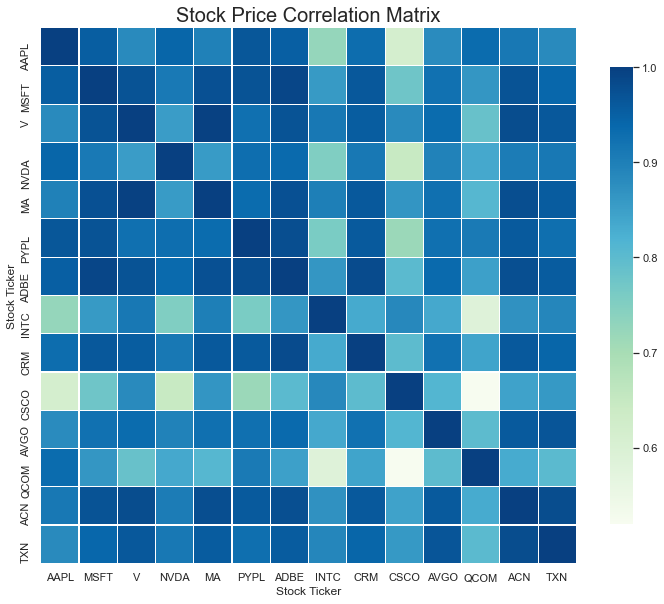

In [39]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(12,12))
plt.title('Stock Price Correlation Matrix',fontsize=20)
sns.heatmap(tech_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),linewidths=0.1,
            square=True,cmap="GnBu",linecolor='w', annot=False, cbar_kws={"shrink": .7})

#### Information Technology: Stock Returns from 2015-2020

 - Shows histogram of returns of stocks for 10 Information Technology companies
 - x-axis refers to the returns while y-axis refers to the number of days
 - Low volatility in AAPL: ideal for long-term/risk-averse sector
 - High volatility in NVDA: high risk & reward play for traders

In [40]:
# Daily Returns DataFrame
# Create a new empty DataFrame called returns. This dataframe will contain the returns for each stock.
returns = pd.DataFrame()

for tick in IT_sector_list:
    returns[tick + ' Return'] = tech_stocks[tick]['Close'].pct_change()

In [41]:
# Monthly Returns DataFrame
monthly_returns = pd.DataFrame()

for tick in IT_sector_list:
    monthly_returns[tick + ' Return'] = tech_stocks[tick]['Close'].resample('M').ffill().pct_change()

In [42]:
# Yearly Returns DataFrame
yearly_returns = pd.DataFrame()

for tick in IT_sector_list:
    yearly_returns[tick + ' Return'] = tech_stocks[tick]['Close'].resample('Y').ffill().pct_change()
    

In [43]:
# Monthly Cumulative Returns
monthly_cumulative_returns = pd.DataFrame()

for tick in IT_sector_list:
    monthly_cumulative_returns[tick + ' Return'] = (monthly_returns[tick + ' Return'] + 1).cumprod()

In [44]:
# Yearly Cumulative Returns
yearly_cumulative_returns = pd.DataFrame()

for tick in IT_sector_list:
    yearly_cumulative_returns[tick + ' Return'] = (yearly_returns[tick + ' Return'] + 1).cumprod()

In [45]:
# Visualize Stock Returns
fig = make_subplots(rows=5, cols=2)

trace0 = go.Histogram(x=returns.loc['2015-01-01':'2020-12-31']['AAPL Return'], nbinsx=50, name="AAPL")
trace1 = go.Histogram(x=returns.loc['2015-01-01':'2020-12-31']['MSFT Return'], nbinsx=50, name="MSFT")
trace2 = go.Histogram(x=returns.loc['2015-01-01':'2020-12-31']['ADBE Return'], nbinsx=50, name="ADBE")
trace3 = go.Histogram(x=returns.loc['2015-01-01':'2020-12-31']['NVDA Return'], nbinsx=50, name="NVDA")
trace4 = go.Histogram(x=returns.loc['2015-01-01':'2020-12-31']['NVDA Return'], nbinsx=50, name="MA")
trace5 = go.Histogram(x=returns.loc['2015-01-01':'2020-12-31']['NVDA Return'], nbinsx=50, name="INTC")
trace6 = go.Histogram(x=returns.loc['2015-01-01':'2020-12-31']['NVDA Return'], nbinsx=50, name="CSCO")
trace7 = go.Histogram(x=returns.loc['2015-01-01':'2020-12-31']['NVDA Return'], nbinsx=50, name="QCOM")
trace8 = go.Histogram(x=returns.loc['2015-01-01':'2020-12-31']['NVDA Return'], nbinsx=50, name="ACN")
trace9 = go.Histogram(x=returns.loc['2015-01-01':'2020-12-31']['NVDA Return'], nbinsx=50, name="CRM")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)
fig.append_trace(trace9, 5, 2)

fig.update_layout(title_text='Stocks Returns (2015 - 2020)')

fig.show()

### Inspecting top stock: AAPL

A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range. A simple moving average is a technical indicator that can aid in determining if an asset price will continue or if it will reverse a bull or bear trend.
 - For short-term swing trading, shorter MA is preferred
 - For risk-averse/long-term investing, use longer MA period

In [46]:
# Line chart from 2015 to 2020
tech_stocks['AAPL']['Close'].loc['2015-01-01':'2020-12-31'].iplot(fill=True,colors=['blue'])

In [47]:
# Simple Moving Average Lines for Year 2020

tech_stocks['AAPL'].loc['2020-01-01':'2020-12-31']['Close'].ta_plot(study='sma', title="AAPL Simple Moving Averages", periods=[20,50,100])


### References

 - [Yahoo Finance](https://finance.yahoo.com/) | Profile Stock Data
 - [Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) | List of S&P 500 companies
 - [dailyPik](https://dailypik.com/top-50-companies-sp-500/) | Top 50 Companies in the S&P 500 By Weight as of 2021
 - [FKnol](https://fknol.com/list/market-cap-sp-500-index-companies.php) | Market Cap of S&P 500 Companies
 - [Tomas Mantero](https://www.kaggle.com/tomasmantero/eda-top-tech-companies-stock-price-dataset) | EDA - Top Tech Companies Stock Price Dataset
 